In [11]:
import pandas as pd
import matplotlib.pyplot as plt

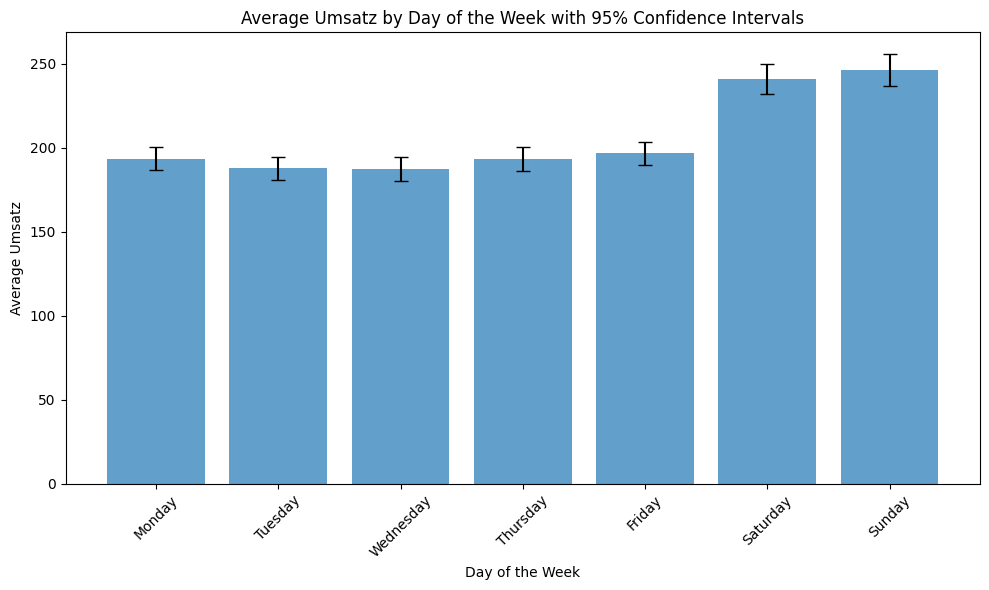

In [12]:
# Define file path again and re-run the data loading and plotting code
file_path = '/workspaces/einfuehrung-in-data-science-und-ml/umsatzdaten_gekuerzt.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Convert 'Datum' to datetime format and extract the day of the week
data['Datum'] = pd.to_datetime(data['Datum'])
data['Weekday'] = data['Datum'].dt.day_name()

# Calculate the average Umsatz by day of the week with confidence intervals
# We assume a 95% confidence interval, calculated as mean ± 1.96*standard error
summary = data.groupby('Weekday').agg(
    average_umsatz=('Umsatz', 'mean'),
    se_umsatz=('Umsatz', lambda x: x.std() / (len(x)**0.5))
)
summary['ci_upper'] = summary['average_umsatz'] + 1.96 * summary['se_umsatz']
summary['ci_lower'] = summary['average_umsatz'] - 1.96 * summary['se_umsatz']

# Reorder by weekday for proper plotting order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
summary = summary.reindex(weekday_order)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(summary.index, summary['average_umsatz'], yerr=(summary['ci_upper'] - summary['average_umsatz']),
        capsize=5, alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Average Umsatz')
plt.title('Average Umsatz by Day of the Week with 95% Confidence Intervals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Define file path again and re-run the data loading and plotting code
x = '/workspaces/einfuehrung-in-data-science-und-ml/umsatzdaten_gekuerzt.csv'
y = '/workspaces/einfuehrung-in-data-science-und-ml/wetter.csv'
z = '/workspaces/einfuehrung-in-data-science-und-ml/kiwo.csv'

# Load the dataset
umsatz = pd.read_csv(x)
wetter = pd.read_csv(y)
kiwo = pd.read_csv(z)

# Convert 'Datum' to datetime format in all datasets
umsatz['Datum'] = pd.to_datetime(umsatz['Datum'])
wetter['Datum'] = pd.to_datetime(wetter['Datum'])
kiwo['Datum'] = pd.to_datetime(kiwo['Datum'])

# Merge dataframes based on 'Datum'
merged_data = umsatz.merge(wetter, on='Datum', how='left').merge(kiwo, on='Datum', how='left')

In [14]:
merged_data.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN


In [15]:
type(merged_data)
print(merged_data)
print(merged_data.shape)
print(merged_data.describe())
print(merged_data.head())

          Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0    2013-07-01            1  148.828353         6.0     17.8375   
1    2013-07-02            1  159.793757         3.0     17.3125   
2    2013-07-03            1  111.885594         7.0     21.0750   
3    2013-07-04            1  168.864941         7.0     18.8500   
4    2013-07-05            1  171.280754         5.0     19.9750   
...         ...          ...         ...         ...         ...   
9329 2017-12-21            6   87.471228         7.0      6.2375   
9330 2017-12-22            6   71.911652         7.0      5.7625   
9331 2017-12-23            6   84.062223         7.0      7.8000   
9332 2017-12-24            6   60.981969         7.0      8.1125   
9333 2017-12-27            6   34.972644         7.0      4.6125   

      Windgeschwindigkeit  Wettercode  KielerWoche  
0                    15.0        20.0          NaN  
1                    10.0         NaN          NaN  
2                     6.

In [17]:
# Descriptive statistics for Windgeschwindigkeit 
wind_stats = merged_data['Windgeschwindigkeit'].describe()
print("Descriptive Statistics for Windgeschwindigkeit:")
print(wind_stats)


Descriptive Statistics for Windgeschwindigkeit:
count    9318.000000
mean       10.974780
std         4.131974
min         3.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        35.000000
Name: Windgeschwindigkeit, dtype: float64


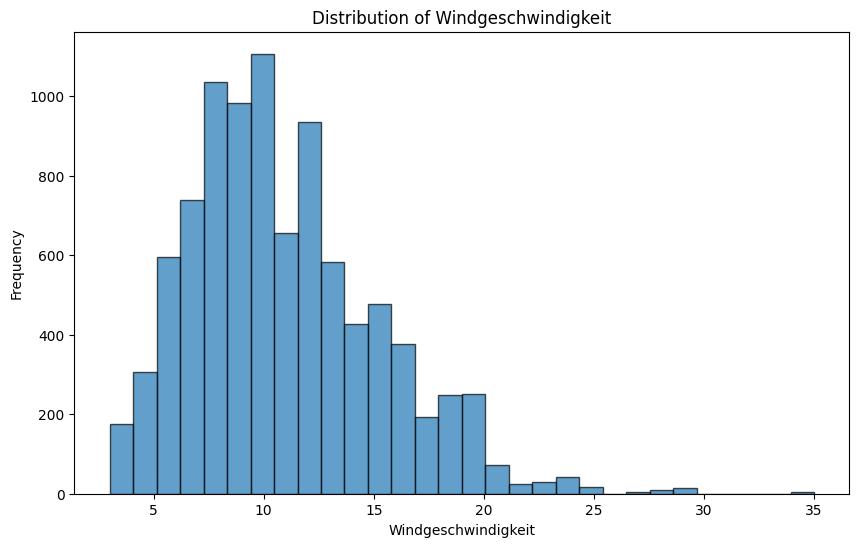

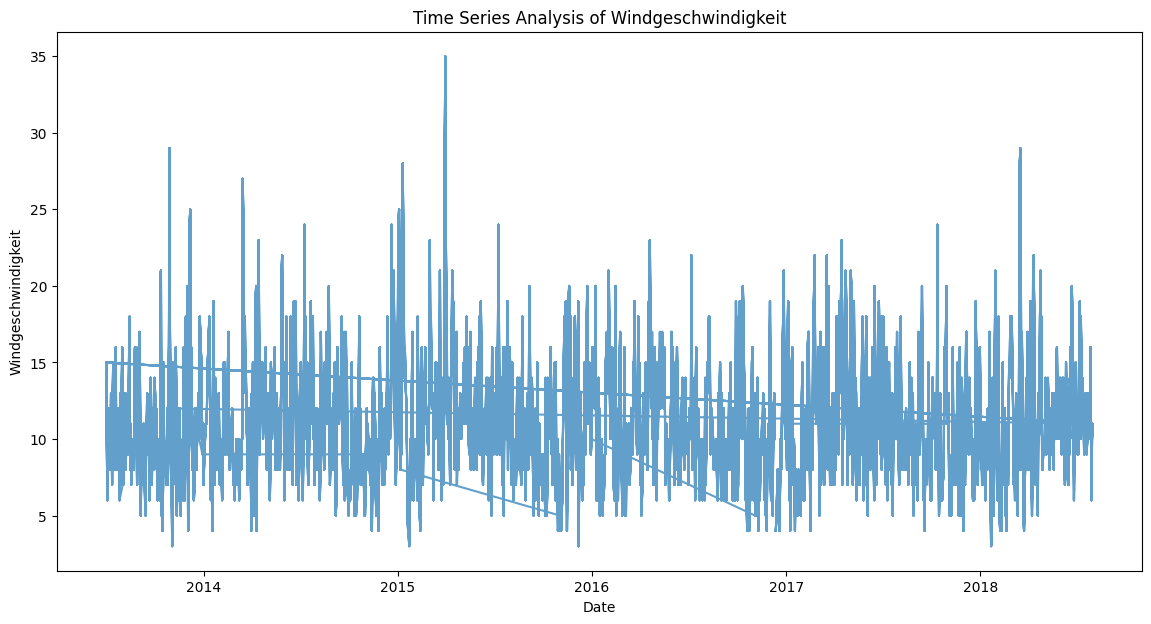

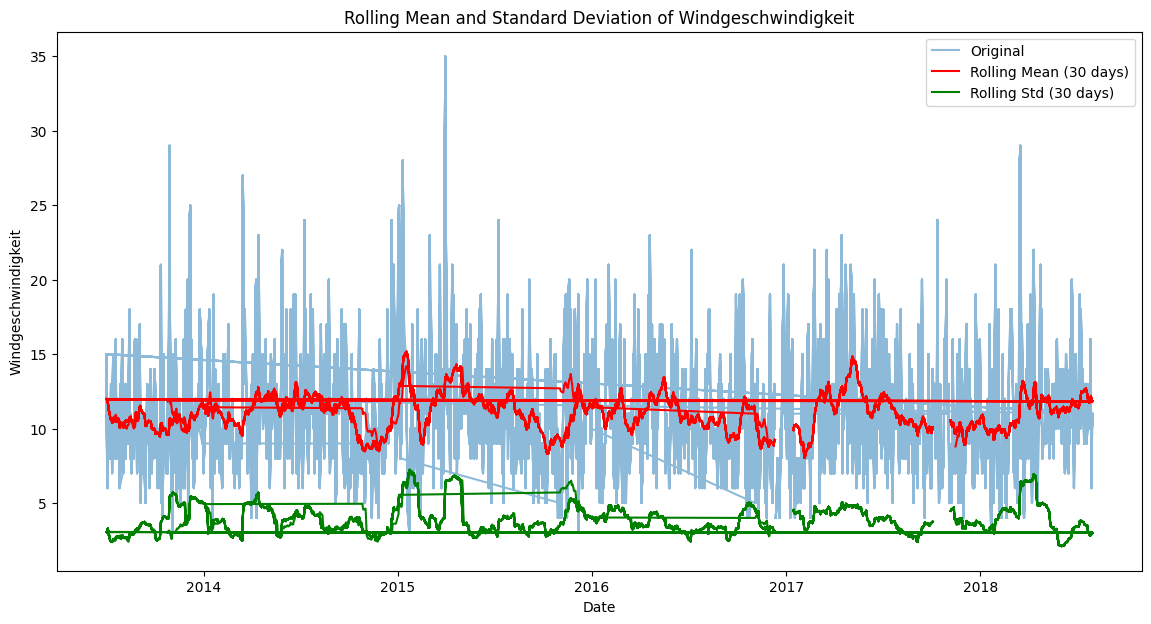

In [18]:
# Plotting the distribution of Windgeschwindigkeit
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Windgeschwindigkeit'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Frequency')
plt.title('Distribution of Windgeschwindigkeit')
plt.show()

# Time series analysis of Windgeschwindigkeit
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Datum'], merged_data['Windgeschwindigkeit'], alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Windgeschwindigkeit')
plt.title('Time Series Analysis of Windgeschwindigkeit')
plt.show()

# Rolling mean and standard deviation
rolling_mean = merged_data['Windgeschwindigkeit'].rolling(window=30).mean()
rolling_std = merged_data['Windgeschwindigkeit'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(merged_data['Datum'], merged_data['Windgeschwindigkeit'], label='Original', alpha=0.5)
plt.plot(merged_data['Datum'], rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(merged_data['Datum'], rolling_std, label='Rolling Std (30 days)', color='green')
plt.xlabel('Date')
plt.ylabel('Windgeschwindigkeit')
plt.title('Rolling Mean and Standard Deviation of Windgeschwindigkeit')
plt.legend()
plt.show()